In [73]:
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import json
from requests import post
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from pylab import rcParams
rcParams['figure.figsize']=11,5
import seaborn as sns
from  sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/My Drive/HR.csv')
df.head()
#df.info()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# №2 Основные статистики
df.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [ ]:
# №4  Сотрудники по отделам
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [ ]:
# №5 Распределение по ЗП
df.groupby('salary')['department'].count()


salary
high      1237
low       7316
medium    6446
Name: department, dtype: int64

In [ ]:
# №6 ЗП по департаментам
df.groupby(['salary','department'])['department'].count()

salary  department 
high    IT               83
        RandD            51
        accounting       74
        hr               45
        management      225
        marketing        80
        product_mng      68
        sales           269
        support         141
        technical       201
low     IT              609
        RandD           364
        accounting      358
        hr              335
        management      180
        marketing       402
        product_mng     451
        sales          2099
        support        1146
        technical      1372
medium  IT              535
        RandD           372
        accounting      335
        hr              359
        management      225
        marketing       376
        product_mng     383
        sales          1772
        support         942
        technical      1147
Name: department, dtype: int64

In [ ]:
table= requests.get('https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view')
table

<Response [200]>

In [ ]:
# №3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.

df_quant=df[['number_project','average_montly_hours',	'time_spend_company',	'Work_accident','promotion_last_5years']]
df_quant_coppy=df_quant.copy()
df_quant.corr(method="pearson")

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
number_project,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_montly_hours,0.417211,1.000000,0.127755,-0.010143,-0.003544
time_spend_company,0.196786,0.127755,1.000000,0.002120,0.067433
Work_accident,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion_last_5years,-0.006064,-0.003544,0.067433,0.039245,1.000000


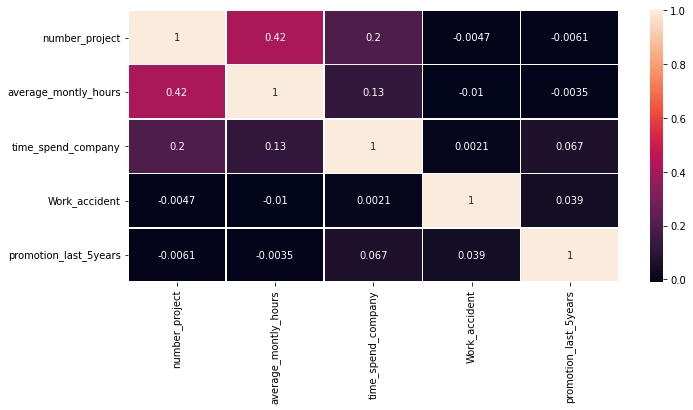

In [ ]:
correlation = df_quant.corr(method="pearson")
sns.heatmap(correlation,annot=True, linewidths=.5)
# Наиболее коррелируещие переменные это:  average_montly_hours с  number_project, number_project и time_spend_company	
# Наименее коррелируещие переменные это: average_montly_hours с  promotion_last_5years, Work_accident и number_project


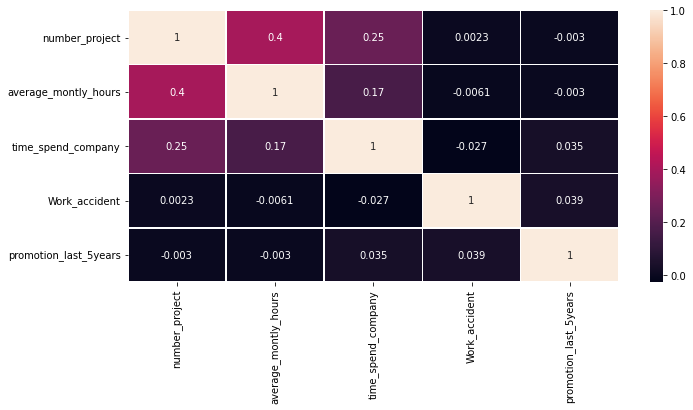

In [ ]:
correlation = df_quant.corr(method="spearman")
sns.heatmap(correlation,annot=True, linewidths=.5)

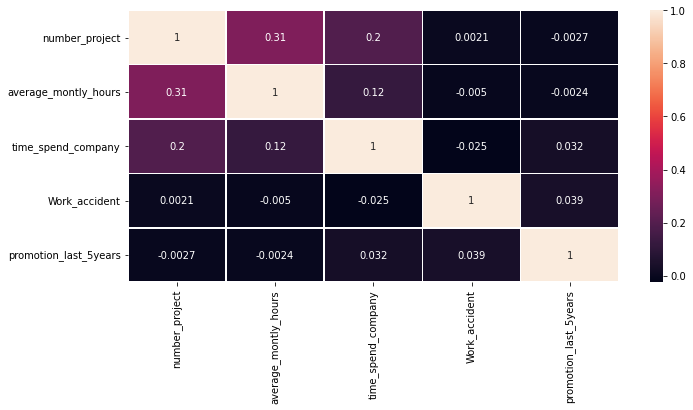

In [ ]:
correlation = df_quant.corr(method="kendall")
sns.heatmap(correlation,annot=True, linewidths=.5)

In [ ]:
# №8 Средняя удовлетвореность  и среднее кол-во проектов среди уволившихся и оставшихся
df.groupby('left')['satisfaction_level','number_project'].mean()

In [ ]:
# №8 Процент сотрудников с повышениями по группам
df_prom=df.groupby('left').agg({'promotion_last_5years':'sum'})
df_prom.div(df['left'].count(),level='left')*100


,promotion_last_5years
left,
0,2.000133
1,0.126675


In [ ]:
#9 
df_cor=df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
df_cor 

In [88]:
X=df_cor[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]
y=df_cor['left']
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.15)


In [89]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [90]:
lda.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [91]:
accuracy_score(y_test,lda.predict(X_test)) # 76%  точнных прогнозов

0.7648888888888888

In [92]:
lda.coef_

array([[-4.43777666,  0.61890197, -0.23547828,  0.00446456,  0.22864532,
        -1.0750813 , -1.07703636]])

In [93]:
lda.means_

array([[6.65911006e-01, 7.15651012e-01, 3.78707224e+00, 1.98963724e+02,
        3.37560374e+00, 1.75110472e-01, 2.59993834e-02],
       [4.42316103e-01, 7.17044400e-01, 3.84029158e+00, 2.06977469e+02,
        3.87375746e+00, 4.63883366e-02, 5.96421471e-03]])